# Problem 3 Part A

In [208]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
dX_train = pd.read_csv('hw2-data/Gaussian_process/X_train.csv',header = None)
dy_train = pd.read_csv('hw2-data/Gaussian_process/y_train.csv',header = None)
dX_test = pd.read_csv('hw2-data/Gaussian_process/X_test.csv',header = None)
dy_test = pd.read_csv('hw2-data/Gaussian_process/y_test.csv',header = None)
bSet = [5,7,9,11,13,15]
varSet = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [209]:
dX_train = dX_train.drop([6], axis=1)
dX_test = dX_test.drop([6], axis=1)

In [210]:
X_train = dX_train.to_numpy()
y_train = dy_train.to_numpy()
X_test = dX_test.to_numpy()
y_test = dy_test.to_numpy()

In [211]:
X_train[0]

array([ 0.30957, -0.36707,  0.45545, -0.20083, -0.73992, -0.80885])

In [212]:
kernelN = []
for x in X_train:
    kernelD = []
    for xI in X_train:
        s = 0
        for dimension in range(0,len(xI)):
            s+=(x[dimension]-xI[dimension])**2
        s=-1*(s/b)
        kernelD.append(math.exp(s))
    kernelN.append(kernelD)
kernelN = np.asarray(kernelN)    

In [213]:
rmseArray = []

In [214]:
for b in bSet:
    tempRmsArray = []
    for var in varSet:
        kernelD = []
        mean = []
        variance0 = []
        for x in X_test:
            kernelD = []
            for xI in X_train:
                s = 0
                for dimension in range(0,len(xI)):
                    s+=(x[dimension]-xI[dimension])**2
                s=-1*(s/b)
                kernelD.append(math.exp(s))
            kernelD = np.asarray(kernelD)
            meanVal = kernelD.dot(np.linalg.inv((var)*np.identity(350)+kernelN)).dot(y_train)
            mean.append(meanVal[0])
        rms = 0.0
        for i in range(0,len(mean)):
            rms += (mean[i]-y_test[i][0])**2
            #covar = var + 1 - kernelD.dot(np.linalg.inv((var*np.identity(350))+kernelN)).dot(kernelD.transpose())
        rms = math.sqrt(rms/42) 
        tempRmsArray.append(rms)
    print(tempRmsArray)
    rmseArray.append(tempRmsArray)    

[9.79744000168137, 7.573866313462718, 6.88250077097094, 6.507100993130914, 6.238957046876008, 6.021790548408504, 5.835316582421543, 5.67037848628028, 5.522017431158787, 5.3871400863070225]
[5.680257884432129, 5.055488321767356, 4.873444672992248, 4.739704734565152, 4.616578137433935, 4.500137003317267, 4.390447443411799, 4.287712610795065, 4.191854180142445, 4.102582866546082]
[3.5576472665589924, 3.4744943457747044, 3.456140110532612, 3.4154717720803256, 3.3622683427713067, 3.304571836091045, 3.2466426594933258, 3.190586870854794, 3.1373852448055457, 3.0874328460485603]
[2.414790661863482, 2.4811528607121116, 2.5163299651563737, 2.5221623670484137, 2.513715414602041, 2.498750074951044, 2.481134342610382, 2.462842706264076, 2.4448973918916503, 2.4278216686730403]
[1.9314777540515504, 2.003680510707774, 2.047552205376961, 2.073032455088347, 2.0885273849263593, 2.0984429755003235, 2.1051443067076447, 2.1099638048141913, 2.113684318415133, 2.1167809727046087]
[1.9096032160812024, 1.959548

In [215]:
print(rmseArray[0])
df =(pd.DataFrame(np.asarray(rmseArray)))
df

[9.79744000168137, 7.573866313462718, 6.88250077097094, 6.507100993130914, 6.238957046876008, 6.021790548408504, 5.835316582421543, 5.67037848628028, 5.522017431158787, 5.3871400863070225]


,0,1,2,3,4,5,6,7,8,9
0,9.797440,7.573866,6.882501,6.507101,6.238957,6.021791,5.835317,5.670378,5.522017,5.387140
1,5.680258,5.055488,4.873445,4.739705,4.616578,4.500137,4.390447,4.287713,4.191854,4.102583
2,3.557647,3.474494,3.456140,3.415472,3.362268,3.304572,3.246643,3.190587,3.137385,3.087433
3,2.414791,2.481153,2.516330,2.522162,2.513715,2.498750,2.481134,2.462843,2.444897,2.427822
4,1.931478,2.003681,2.047552,2.073032,2.088527,2.098443,2.105144,2.109964,2.113684,2.116781
5,1.909603,1.959549,1.990804,2.011915,2.027370,2.039465,2.049463,2.058105,2.065845,2.072976


# Problem 3 Part B

The value of rms is least when b is equal to 15 and when the variance value is 0.1. The general trend is that the value of root mean square error reduces as we increase the value of the variable b. Possible drawbacks involve 1. It takes a lot more time to execute. 2. One needs to find the right b and variance (two parameters in comparison to one i.e lambda) to get the minimum least square error

# Problem 3 Part C

In [239]:
kernelD = []
mean = []
b = 5
var = 2
variance0 = []
for x in X_train:
    kernelD = []
    for xI in X_train:
        s=(x[3]-xI[3])**2
        print(s)
        s=-1*(s/b)
        kernelD.append(math.exp(s))
    print('')    
    kernelD = np.asarray(kernelD)
    meanVal = kernelD.dot(np.linalg.inv((var)*np.identity(350)+kernelN)).dot(y_train)
    mean.append(meanVal[0])
mean      

0.0
0.026396175961
1.0491290329
0.13063164489999998
1.1028570288999997
1.4055762249000001
0.009549198400000004
0.46464672249999983
0.088719388164
2.5148567889000004
0.19699394559999997
0.5293581049000001
0.6352568209000002
0.2262238969
0.5536104025000002
0.5892097600000001
0.7631245448999999
3.3556011489000004
0.5982713103999999
0.015279432099999999
0.30878026239999995
0.026014464099999995
3.8057376889000003
0.6772796208999999
0.07016671209999997
0.25153234090000004
0.19283515690000005
0.3423654144000001
0.3878673841000001
0.059389690000000016
0.1816293924
0.015868440899999992
0.37767170249999993
3.2613831649000002
0.5892097599999998
0.041002200099999976
0.48575324160000005
0.0031933801000000005
0.3633437284000001
2.7673320609
1.6466792329000002
0.7922246048999999
1.3121015209
0.5022982129000001
0.1401603844
0.5483698704000001
0.020969646481000005
1.4251106884000002
0.5606415375999998
0.4071588481000001
4.9614444049
0.11817781289999997
3.9821399809
0.0009369720999999999
0.4792100624999

0.09083593210000003
2.9708314321000002
0.8475780096000001
0.021656065599999996
0.0005542728489999997
0.6221896641
0.9206210600999999
1.8810396801
0.6409123248999998
1.2588615601000002
1.8972583081
6.1534259721
2.4112188961000003
1.1352689401
0.7900720996
0.4824830520999999
0.023784733728999998
3.5838654721000003
1.7854037161
0.8090822600999998
0.013860352900000003
0.0025624856409999994
0.1463980644
2.1344917801
0.5023123875999999
0.16497406890000008
0.7386027364000001
2.3424608601
0.13752972250000006
1.4335512361000002
0.10104133690000003
1.1730839480999997
1.5719893641
1.0904789475999999
5.910295832100002
1.1858992200999998
1.1102415423999998
0.011227521599999997
3.0853273801
0.04490584809999999
0.004989303225000001
1.2247627560999998
0.8110623481
0.15185050239999998
2.8541061481
1.4991308720999996
0.19387289609999997
0.36050417639999993
0.018651364900000005
1.1352689401
0.6791572921
0.8110623481
2.7360798921
0.16785409
0.30617408889999986
0.04441134760000002
1.3584135601
1.0132234280

0.014713689999999991
1.0831397476
0.6579967688999999
0.88266025
1.4790451455999998
3.3817371025000003
0.4177553956
0.8628552100000001
0.3246720400000001
6.460747240000002
5.6780217796
5.488852408900001
5.0035873969
0.15462983289999999
5.0511214009
0.045411610000000026
0.1649984399999999
2.7712593840999995
0.05489648999999998
5.351819560000001
3.4121108960999997
0.14554224999999996
4.764266598399999
2.0765415224410004
1.2351655044
0.05107599999999999
7.389698559999999
0.6889
1.2800433321000002
6.28254225
1.4279533009000003
3.0483064836000002
1.836236386084
1.9859404667560003
4.23989281
4.8727913536
7.85793024
0.46308025000000014
3.0441874575999996
5.594171039999999
6.317682250000001
3.2828728968999994
1.3694616575999998
3.1770923536
3.1435999204000002
0.8303583376000001
6.0486483600000005
5.1308139169
6.31215376
5.281217648100001
4.259311716100001
1.0394822025
1.1833741089
1.1452638289000001
0.0005017599999999989
4.5107388225000005
4.95107001
5.18427361
4.945820166400001
1.2880434064
2.

0.11899050250000003
0.016468588899999994
1.5779881923999997
0.18263656960000002
0.5946414769
0.07142079866089
0.0114768369
0.41319184000000003
0.6203295120999999
1.57803844
0.6889000000000001
1.68013444
1.0757838399999997
1.8843052900000001
0.9686890083999997
2.1588424899999996
2.10047049
1.8297972900000001
0.13319726144400001
2.15179561
0.7366788900000001
0.3341418024999999
0.5089966335999999
0.07589474009999998
2.1173160099999997
1.16812864
2.06640625
2.8981657600000004
0.06769363240000001
0.0548871184
0.3661823168999999

0.5536104025000002
0.338236459561
3.1269556224000006
1.2220860304
3.2192254084
3.7234333444000005
0.4177424689000001
2.03262049
0.19908730086400003
0.7085935684
1.4110826520999997
0.00027159040000000165
2.3749275664
0.07204929640000003
0.0
0.0005546024999999981
2.6166944644
1.1832653283999999
2.3028973009
0.7528338756000001
1.6892980729000002
0.8196405156000001
1.4563179683999998
2.4555516804
1.0179599235999999
0.058815950400000004
1.3999149124000003
1.7666928889
0.

8.690173368100002
0.16022407839999997
2.6395526089000003
0.4101762025
0.031184028100000007
3.4382059775999996
0.0005546025000000034
0.002217468100000007
0.7796360209000001
3.0441525625
4.441176908099999
5.910295832100002
0.08050271290000002
2.60144641
0.913865257369
0.015279432099999999
0.08319186489999998
0.0008637721000000016
3.457440000000126e-05
0.18062499999999995
0.977976611329
0.45824776360000014
6.8927776681
0.5073143076
0.09225798760000001
0.14637510809999998
0.04743248409999997
0.058269132099999996
0.14370922810000003
3.5704369935999996
0.4503215236
0.007385683599999983
3.481993320100001
0.012773520400000002
0.07016671210000004
0.031184028100000007
1.0954029582250002
6.371131292100001
0.95253071413824
0.876000530601
4.205821656100001
6.2530503721
7.1546085361
5.6273802841
0.1255710096
0.2329896361
0.06110289610000001
0.4503215236
0.5659402441
2.9665928644
0.6503616025
0.013850936100000016
0.008008460100000012
0.32468343609999994
6.733038936099999
3.2106905856000005
1.03705708

2.1416273649
0.026797689999999985
9.471006249999999
1.9960038400000002
6.019809460899999
3.9588265024000004
8.51822596
7.167506928400001
7.582863690000002
0.039601000000000025
5.1203090961
5.790953473599999
4.2594768225
0.47279376
8.177884090000001
0.18774889000000003
1.2221965808999997
3.5306785801000005
1.9365783921
7.3323433089
7.589474010000001
9.87404929
7.180148976400001
1.1078615025000003
5.211312808900001
1.9497095424
0.48916036
7.1046237025
5.9335113744
0.5397840899999998
7.357873251599998
2.6320519696
2.6358821316
9.83700496
1.4819897168999996
0.0008008899999999995
5.9909905225
5.859159124900001
4.4610508944
0.05764800999999999
3.7008140625
8.72552521
1.6894280484
1.5107851396000003
0.008667609999999992
3.7690727881000003
9.87404929
0.9162126961
8.39492676
4.42134729
3.114571984225
4.841848176399999
2.0428699041
0.27071209000000024
0.07144929000000005
7.389861664899998
9.34830625
4.636787022399999
2.3750816769000003
0.032041000000000014
5.5443295296
0.03956121000000003
7.0107

0.07785216040000005
0.4487418939240001
0.37911850707600014
0.0011655395999999965
0.03329895039999995
0.6056574975999998
7.319513811600002
0.07851204000000006
0.11576325759999992
0.23867133159999998
0.04540734810000005
0.7305462784000001
0.05881595040000003
0.06347376360000005
1.2403722384
0.18873811359999995
0.05768162889999994
0.23759775359999988
0.07459999689999994
0.0015093224999999954
1.0108492681000003
0.8782126369000001
0.9116239441
4.010246553599999
0.009779232099999985
0.04005601959999995
0.06347376359999997
0.03958508160000001
0.7921712016000003
0.1806250000000001
0.13405849960000005
0.30100584960000004
0.36903802522500007
0.18364653159999994
0.3619213568010001
0.29196731559999983
5.2274420496000005
0.9571295889000003
0.026396500900000036
0.004192562499999997
0.05996621439999994
3.5836761636000007
0.13405849959999994
3.3472897936000003
6.5928778756
7.409066241600001
2.0969356864
0.4630503084840002
0.6908435689000001
7.338464281600001
4.3964024976000005
2.3280046084000006
0.128


0.015868440899999992
0.083197056721
0.8069428900000002
0.055441411600000004
0.8541456399999998
1.12275216
0.0500372161
0.30878026239999995
0.179630173584
2.93025924
0.10104133689999999
0.7285305315999999
0.45032152360000016
0.3619225599999999
0.7569348004
0.7984673448999999
0.55890576
3.83298084
0.4192692001
5.569599999999874e-06
0.18465068410000002
0.0012475024000000014
4.3130982399999995
0.4858090000000001
0.019298766399999997
0.3937562499999999
0.09806918560000007
0.21081872250000006
0.5606415376000001
0.013860352900000013
0.30486962249999994
0.0
0.5483698704
3.73223761
0.4116890568999999
0.0058553103999999965
0.6772137849
0.03329895039999999
0.22734777610000007
3.2023102499999996
1.98584464
0.58384881
1.0393802500000002
0.33960921760000007
0.06170752810000001
0.7508049201
0.073321266841
1.7417400625
0.38786738409999993
0.2622668944000001
5.538491560000001
0.047436839999999994
4.500762250000001
0.02451729639999999
0.3206730383999999
2.8781122499999996
4.2737292899999995
0.466215840

0.23527350250000015
1.6770768004
0.20973652090000003
0.6986953744000003
0.5588758564000001
0.22621914062499995
3.8146777344
0.16401430817423998
0.13319507168099998
2.1898672323999997
3.7234333443999996
4.4260585923999995
3.244393488399999
0.04692855690000002
0.007796890000000008
0.6694185124000002
0.010014004899999988
0.032869689999999986
1.3256989321
0.05544141159999999
0.47428014240000027
0.43623383040000024
1.392400000000165e-06
4.0958473924000005
1.4904747225
0.20013991689999994
0.10481600500899997
0.23871041640000007
0.4346501184000001
2.7946477583999996
0.2503601295999999
0.6753223684000003
2.8144088644
7.7329598723999995
3.4336831203999996
0.5856534784000003
0.34650882250000015
0.15555136000000003
0.206509351489
4.8106526224
1.0732545604000003
0.35913651840000005
0.03329895039999998
0.12308239056099997
0.006791408100000006
1.3474102084000004
0.1668967609
0.011227521600000023
1.3447417368999999
3.3515357183999996
0.004990009600000013
2.2425661504
0.0003118756000000023
0.612901094

1.6466792329000002
1.2561052191210003
5.3245562500000005
2.7049065156
5.444755560000001
6.0949734399999995
1.4054339601
3.8607534144
0.970957978384
0.09156675999999998
2.9827707848999996
0.30875803560000004
4.3274816676
0.6522177600000002
0.2907150724
0.26587429690000003
4.65178624
0.30096196
4.2300560241
1.9791987856000002
3.3815899881
2.0866380304
0.44568975999999993
4.436078440000001
2.3966755344
0.6110548900000001
2.9665239696000003
3.4907317224999996
0.4361809935999999
2.3315152249000004
0.7345347025000002
1.98584464
0.44713294240000007
0.27321528999999994
4.205903688899999
2.2073639183999996
0.3437125129000001
1.5048419584000001
3.5570337201000006
0.1446280899999999
0.0
4.723232890000001
5.898583690000001
3.9679046416000006
2.7476709121000003
0.2945341441
1.2960023732410002
0.008001302500000005
4.1289833600999994
3.6914705424000007
0.8915136400000003
2.647129
0.5073712899999999
1.5690568644000003
3.9025212303999997
0.08254128999999993
0.43309560999999985
4.376464
0.04743683999999

4.9355509921000005
0.8346284164000001
0.009549198400000005
0.016770250000000014
0.09587073689999998
3.3427174561000004
0.1856661921
3.1145543361
6.2645584681
7.0607649841
1.9136018889
0.3791209699840001
0.5873996163999999
6.9918465241000005
4.1290646401
2.1346086609
0.17863302250000007
0.4027044681
1.8522121215999998
9.740703420100001
3.5085410721000003
0.5910380641000001
0.01897230759999999
1.1028150224999997
0.3521116921000001
0.22618584809999995
3.3948431001
0.3451445001000001
3.5884103760999997
1.4279294016000001
0.5208220224
0.16497406889999994
1.6316741168999997
0.006222054400000001
0.33961306382689
0.9161169795999999
0.042935984100000005
0.0038937600000000013
4.436120564099999
0.00040040009999999887
0.19908551610000008
0.03504009609999999
0.2732048361000001
0.018012324099999984
0.38352010409999987
0.3591485041000001
4.851931344099999
0.23527156230399998
5.3680719481
2.9183230561
0.07396224159999999
0.018651364900000005
1.2667502499999999
0.3661339080999999
3.7280272561
0.3451445

0.02754936039999993
0.3062294244
0.008219235599999973
2.3604327769000006
0.09369108810000006
1.4222947600000002
3.5702858304000005
0.005856840899999981
0.02342124160000002
3.4381318084000005
0.015281904399999961
0.9342382336000001
0.9319585444000003
0.29973435039999996
1.8811494025000002
6.556774784400001
0.019957212900000035
0.028341722500000038
0.2273382400000001
8.003354160399999
0.4424511289000002
0.1332104003999999
1.6618819396000004
1.8490016484000005
6.2291174724000005
0.4192692001000002
0.3062294244
2.6625427929000005
0.09515991039999992
0.2364098884000001
0.6791490510250001
0.1509322500000001
1.3447417369000003
9.667249008400004
5.389919424400001
0.016772840099999946
0.2195672164
0.18974736000000014
1.0978638841
5.807714406400001
0.05488711840000007
7.7719403524
0.0034656768999999843
0.03774471839999992
5.500056848400002
1.3999149124000003
1.9958625625000004
10.007226096400002
1.0155802176000004
0.14820190090000007
2.488758656400001
1.6770768004
7.804871438400002
0.10104769439

0.47921006249999976
0.7305445689609998
0.11023728040000014
0.10944187239999993
0.1281067264
0.2433646224000002
0.6240526008999997
0.00011235999999999878
0.9803138516639998
5.1896484864
0.06170752809999996
2.0158888323999995
0.010978848400000043
1.3639436943999996
2.0629576899999997
2.1311620224999994
0.03287694240000005
6.370979846399998
0.006598312900000022
0.3233514495999998
0.01865136489999996
0.28191852159999986
6.985871886399999
0.017087718400000045
0.1826365695999999
1.4251106883999995
0.0640697343999999
0.011476836899999964
1.7293302016
0.20119710249999986
1.2508856648999995
0.3206730383999999
1.70772624
6.240903312399998
0.005677622500000004
0.23986485759999993
1.9299044240999996
0.5606415375999998
0.00800488089999997
5.549699408399999
3.9025212303999997
0.03913275240000004
0.20540836840000015
0.00027159040000000533
0.10104133689999992
2.0528298729
0.7006677694809998
3.5571091608999996
0.003193380100000007
0.0029333055999999744
8.5245313024
0.12143831039999993
7.2241613284
0.52

3.0194275224999996
0.6986953744
0.07331639289999997
0.3952385424
0.00013853290000000006
0.4503215236
2.5448225624999994
1.4761035025
0.9184347225
1.4731890625000004
0.6037445401
0.1959478756
0.45190661759999995
0.005856687841
1.2667502499999999
0.6675543616
0.49895857690000023
4.661928722500002
0.16978520249999998
3.7142925625
0.0014190289000000007
0.5784058808999999
2.2567550624999995
3.5083163024999995
0.7692167025000002
2.0527725625
0.0
0.6752894976000001
0.0021085545610000003
2.1725286025000003
4.4358678225
0.19490459040000002
0.6129480681
0.0405257161
0.44245112890000005
1.0251157503999997
0.7487613961
0.7900543225000003
0.0016982640999999997
0.8153909400999999
1.6018699225
2.5260334225000003
0.3113974809
0.5946568995999999
0.013042325209
0.5157394225
0.3061740889000001
0.7589023225000001
0.6986953744
0.17368889760000006
0.021658125889
0.02716563239999999
3.1814073224999997
0.01677025
0.28946552039999995
1.4990329225
1.1226462025
1.1732139225000002
0.21406352889999997
1.09788484
0

5.990549953600001
0.77334436
5.7340133764
9.984336039999999
11.092230249999998
1.0659530024999997
0.1255993600000002
10.021656490000002
1.0465903808999997
4.7640483288999995
0.10252804000000003
3.47747904
4.024336905625
10.13403556
8.86431529
2.8460702209
0.15000128999999998
10.89726121
2.6778049600000005
7.1670250369
4.898608358400001
9.87342084
8.4147566724
8.86431529
0.17859076000000007
6.182234688100001
6.9171104016000005
5.232427502500001
0.83028544
9.50673889
0.43151761000000005
1.7665865569000003
4.420968812099999
2.6089033441000002
8.593281844899998
8.87146225
11.329282809999999
8.428454112399999
1.6285588224999998
6.282191344899999
2.6241408064000002
0.851929
8.346609902500001
7.072833870400001
0.9183388899999999
8.620918099599999
3.4075683216000003
3.4119261796
11.289600000000002
2.0763945409000004
0.06345361000000001
7.135576562500001
6.9916349889
5.455587918400001
0.0002722499999999987
4.6111120224999995
10.096506250000001
2.3206866244
2.1104535076
0.10029888999999999
4.687

0.6129355416039998
0.2550957049000001
2.32440516
0.12474317609999992
3.5260952841
0.3661823168999999
0.11337362409999989
0.09806918559999993
3.8194057488999995
0.5641061449000002
3.4382059775999996
1.4505070968999998
2.6779358735999996
1.5426882024999997
0.7570218049000003
3.6241879128999996
1.8107739224999995
0.3355073928999999
2.3100656121
2.7751561744
0.20973652089999983
1.7541942916
0.42847497639999993
1.4561972928999996
0.2173517640999999
0.5258715289000001
3.416434689599999
1.6467305624999995
0.1473024399999999
1.0490880624999999
2.8343069315999996
0.33962087290000004
0.04099410090000006
3.8841708888999995
4.9561000129
3.2022744600999995
2.1174324195999996
0.11576325759999992
0.8760042744009997
0.012773520400000028
3.347143430399999
2.9544453225
1.3148520889000006
2.0292857208999995
0.8368041529000001
1.1028150224999997
3.143564460099999
0.23987465290000004
0.7405807249000002
3.5703236208999996
0.17662687290000012
1.0251157503999997
0.03637411839999996
0.9342401667209997
6.182334

0.33550739290000003
1.6862580736
0.4710900496000001
0.01331254440000001
3.12688489
3.9213504576
0.000234396099999998
3.1519031295999995
0.27821405160000007
4.4708565136
2.2004458921
0.08732025000000003
3.7598761216000005
3.3169151375999997
0.24686985960000007
3.7370302596000005
0.3010277955999999
0.0227074761
0.3893385609
3.0688733123999996
0.004662158400000001
1.6047062329
0.58199611703689
0.15094002010000002
1.2960456336000004
1.6467305625
0.5784515135999998
1.7573214095999998
3.2106905856000005
2.3495984655999997
3.4906943556000005
2.1899856196
3.8609892035999995
3.7827916036000007
0.7345518435999999
0.740635802404
0.9433459876
0.1315222756
1.1528102161
1.4618744463999997
0.04846602250000003
3.8053865475999995
0.3424122255999999
3.7370302596000005
1.4562696976
0.055441411600000004
0.06830904960000002
0.01198806009999997

1.7793692449000003
1.3723208745210003
5.56110724
2.8742455296
5.683932810000001
6.347880249999999
1.5282151641000001
4.062562736399999
1.0734451891839998
0.06345361

0.871603358409
0.08116971940900002
0.7569400205290002
0.8281855422090001
0.710552901249
1.4904820476090004
1.2826762978090003
0.008217785104
2.4590850136089997
0.0004005521904399999
0.00040056019600000003
1.1986899534089999
2.3859343546089997
2.9544350094089995
2.0057555650089993
0.361926169609
0.223987332529
1.4475771414090004
0.08116971940900002
0.041482690929
0.5873950178890001
0.022354137168999994
1.1527307644090004
1.0929719752090004
0.149114139409
2.685819489409
0.698690359129
0.0038933856089999994
0.0037478883999999997
0.7630948438090001
1.0904643280090003
1.6557178420089997
0.7838145208889998
1.4562528030090005
1.6709362666089997
5.740082847408999
2.1551619942089997
1.3230819640090004
0.9479417461290001
0.607422273129
0.004824691599999999
3.270118872409
2.0191074282090002
0.9687539680089998
0.041003415049
0.0011656761640000005
0.21844686868899998
2.3893523370090004
0.6296470110089999
0.24101521048900007
0.6000934676490001
2.090184388009
0.20758320576900005
1.237760827209
0.1621

0.021313080099999986
0.2022930529
9.2047312449
0.37047916889999993
0.00013853290000000136
0.02562240490000005
0.2932872335999999
1.3999385760999998
0.3260295800999999
0.33687576809999986
2.0799119960999994
0.011229640900000025
0.007796889999999989
0.025271460900000018
0.0030625155999999937
0.08387974439999993
1.7792358544
1.6017433599999995
1.6467562275999996
5.433700860900001
0.05270697639999995
0.016468588899999987
0.005856840899999981
0.016772840099999946
1.4847666201
0.5677170408999997
0.4824830520999999
0.048474828900000086
0.8760117620249998
0.01001400490000002
0.8650283447609999
0.0448888969
6.8373359289
1.70772624
0.24102208359999994
0.06954823839999992
0.00698728809999999
4.9351955409
0.001419028900000007
4.6570934809
8.387568976899999
9.305123184899998
3.1561299024999996
1.0179760667039999
1.3447649296
9.225981004899998
5.8817405529
3.4382430625
0.0008661249000000105
0.05825947690000004
3.0771474723999996
12.349812492899996
5.1362516689
0.14105282490000012
0.06527003039999997

0.0037478883999999997
0.050036768721
0.9274653025000001
0.09012604409999998
0.9780221024999998
1.2641629225000004
0.025261923600000007
0.3849333848999999
0.128937010084
2.7127737025000003
0.14639806439999997
0.6221896641
0.5414163561000002
0.28820792250000005
0.6484597729000001
0.6869425924
0.6599125225
3.5836383025000003
0.5073143076
0.0038925121
0.2444906916
0.010014004899999998
4.048345202499999
0.5802630625
0.041481468899999985
0.3166875625000001
0.14281596810000005
0.27447121
0.4678696801
0.03329895040000001
0.23755876
0.004192562499999997
0.45666509289999996
3.4862491225000003
0.49897270439999986
0.019957212899999986
0.5748369124000001
0.013860352900000001
0.29328723360000003
2.974762562499999
1.8075458025000004
0.6869923225
1.1755980624999998
0.4192692001
0.0980691856
0.6427870276000001
0.042447948841000005
1.5750249999999997
0.4727112515999999
0.3327789969000001
5.2379188225
0.07983450249999999
4.2302205625000004
0.008432748899999998
0.39819886089999984
2.6626080624999995
4.010

0.07204929639999999
1.0179599235999999
4.8414081024
0.13928570409999994
0.03682561000000001
1.1910448225
0.20331080999999998
0.04342639210000003
4.235034726399999
2.8144088644000003
0.24569866240000002
0.5641211664000001
0.09880963560000004
0.00040040009999999887
1.2880207081000001
0.290735561601
2.5222839488999997
0.12557809689999996
0.059389690000000064
6.873940112400001
0.0025623843999999997
5.711717606400001
0.18062499999999995
0.08872057959999995
3.860910606399999
5.455587918399999
0.17171078440000007
3.5926169764000004
0.21406352889999997
1.6497604249
0.258662770921
1.0226872384000003
6.5988361924
0.0004490160999999971
1.5514695363999997
0.06830904959999999
0.04100625000000001
2.176067522499999
0.16211896960000008
0.1816293924000001
0.2538950544
1.8650272356000002
2.9870900224000003
4.210786080400001
0.0090935296
1.5222871161000002
0.332782458129
0.06527003040000003
0.008219235600000013
0.16685591040000006
0.13928570409999994
0.00210772809999999
0.37190116656899996
0.0887146225
5

0.3661823169000001
0.48246916
4.9248486399999996
0.30747025
2.5447587529
1.2800207044
4.244836090000001
3.3084699664
3.5925411599999997
0.43467648999999986
1.9726483401000003
2.3967374596
1.4533508025000004
0.029138489999999986
4.005601959999999
0.18062499999999995
0.06112267290000003
1.0418489041
0.2844195561000001
3.4207612209000002
3.5970915599999995
5.216656000000001
3.3170608384
0.03773306250000001
2.0292857209000004
0.28946552040000006
0.025249209999999977
3.2657911225
2.488758656400001
0.015276960000000011
3.4382059775999996
0.5837876836000001
0.5855922576
5.189739610000001
0.1289312649
0.6889
2.5260334225000003
2.4406875529
1.5720645924000003
1.2064825599999995
1.1351837025
4.39153936
0.19490459040000002
0.13752230560000003
0.58553104
1.1731272721000001
5.216656000000001
0.009779232100000007
4.15792881
1.5485313600000004
0.8217694452250002
1.8012860944
0.3260295801000001
1.90053796
0.34928099999999984
3.4600836168999995
4.836480640000001
1.6770768004
0.46625680890000004
0.46144

0.5518632656249999
2.042626932025
1.598720004025
1.658956880025
0.4455896256249999
0.7105562730250001
0.141041558025
0.9228964556250001
0.6714081660250002
0.8715996240249999
1.7200453650250003
1.4962304720250001
0.0
2.182991475025
0.004989755299239999
0.012246963555999997
1.0084075980249998
2.1141014600249997
2.6510189580249994
1.7572021040249997
0.47921698502499993
0.318011405625
1.6739313780250002
0.141041558025
0.08662720562500001
0.4566583352250001
0.057679227224999984
1.3556061330250004
1.2907345710250002
0.22734300802500004
2.396907758025
0.5553603006250001
0.0007983450249999998
0.023065104384
0.929691282025
1.2880093590250001
1.4306432490249998
0.9525467202249998
1.6832597340250004
1.4447919800249998
5.3139239880249995
1.8972169860249999
1.5398452190250003
1.1326812756250002
0.7569435006249999
0.0004491008639999998
2.950476113025
2.284949676025
1.155420759025
0.08593399102499999
0.015573542435999998
0.31140306122499994
2.6778213240250004
0.7817300640249999
0.33824111222500003
0.

2.9829780369
2.448164044921
7.570201960000001
4.362082873600001
7.713395289999999
8.48382129
2.6549769481000003
5.8022210884000005
2.0428184499840003
0.019965689999999994
4.7131107409
0.9991201936
6.371383705600001
1.5662522500000002
0.9664462863999999
0.9206978209
6.763640489999999
0.010962090000000002
6.2530503721
3.4252385476000002
5.2112214961
3.5661300964
0.05004169000000001
6.503010010000001
3.9681436803999994
1.50209536
4.6926823876000014
5.3465000625000005
1.2195668355999998
3.8841708889000004
1.6924709025000002
3.4339796099999997
1.2378342563999998
0.006209439999999997
6.223677772899999
3.7234333443999996
1.0612502289
2.7909711844
5.428480608099999
0.004044960000000013
0.19704720999999997
6.84973584
8.25183076
5.933413939599999
4.416344280100001
0.9733992921
2.503739747041
0.2844622225
6.130031292099998
5.5942656483999995
0.2503000900000002
4.28862681
0.07203855999999999
2.8781801104
5.853399584399999
0.024523560000000024
0.045881639999999974
6.430788809999999
0.05112120999999

0.23871041639999996
0.40561613440000016
0.004192562500000004
0.4989727044
0.008869872399999998
0.010732960000000005
0.9319585444
0.3396325284000001
0.15094002009999996
0.4042162084
0.17763696089999997
0.03504009610000001
0.7345689849
0.6221896641
0.6503616025
3.4381318084
0.0611226729
0.12143831039999997
0.16022407840000003
0.12061729000000007
0.55011889
0.07654075560000001
0.047436839999999994
0.4857811204000002
0.21081413102500002
0.33279053440000006
0.205443721081
0.47428014239999994
4.5711295204
0.6888834001
0.0001996569000000009
0.04540734810000002
0.15462196839999998
3.0440478784000002
0.2646896704000001
2.8265006884
5.853109262399999
6.6235199044
1.6893240675999996
0.283170851044
0.46625680890000004
6.556774784400001
3.7963404964
1.8973409536
0.25627893760000003
0.5157825124000001
1.6316741168999997
9.2259202564
3.2023818304
0.7265516644000002
0.04898696889999999
0.9342382335999999
0.4583019204000002
0.3126822724
3.0937995664
0.45034836640000014
3.2787069183999997
1.2351432769
0

1.5631500675999999
0.8520028416
1.3887208336000003
0.55011889
0.1659340225
0.5006270025
0.012507961920999995
1.3474798560999997
0.6111017928999999
0.45032152360000016
4.815654691600002
0.14193302759999998
3.8516417535999996
5.5696000000001355e-06
0.5259440483999998
2.3640907535999993
3.641837889599999
0.7085262276000001
2.1552001635999996
0.0012467960999999986
0.7345689849
0.006598150440999997
2.0696850496000003
4.5858509316
0.16497406890000002
0.6694839684000001
0.027556000000000004
0.39672361959999997
1.0978638840999995
0.6889000000000001
0.7285305316000001
0.0058553103999999965
0.88040689
1.6924969215999996
2.6395201156
0.27323619839999996
0.6503616025
0.022354137168999994
0.4662704656
0.2683447204
0.6986285056
0.6409123248999998
0.14550410250000004
0.03329785552899999
0.016772840099999995
3.3086154815999995
0.008871756100000005
0.25271734409999996
1.4138161216000003
1.0490675776
1.0979686656000003
0.18263656959999996
1.1731272721000001
0.01833045210000001
0.5191346601000001
1.12266

5.9679558436
9.23369769
0.19802500000000006
3.9214296675999996
6.763640489999999
7.5570010000000005
4.1917239169
1.9761049475999999
4.072081843600001
4.0341525904
1.3150126276000003
7.262486010000001
6.253150396900001
7.55095441
6.4190782881000015
5.286826476100001
1.5751505025
1.7512022889000003
1.7047741489000003
0.06651241000000001
5.5665324225
6.05455236
6.31215376
6.048746736400001
1.8780509764
3.3689134116000004
3.5884482624
7.891042809999999
2.732326350625
7.230721
2.7518198173210004
7.844480639999999
0.0006708100000000017
1.6438573369
4.401562040100001
5.406601544100001
6.2767285155999994
0.13498275999999995
6.8990275599999995
0.18567481000000005
0.09437183999999994
0.21298224999999982
0.6599612644000001
2.496343120324
2.0428699041
0.20115224999999992
0.026797689999999985
0.5397547024
6.8558090896
8.010598090000002
0.6968075625000002
0.8561800899999996
0.10407076
8.78826025
5.4449889025000004
1.3123077136000003
7.779078810000002
7.13584369
0.12475023999999997
7.74620224
0.09084

0.012771260100000013
0.05003274239999995
9.54315664
0.268324
8.16416329
0.7963420643999999
0.02873703040000004
5.916083289999999
7.857369609999998
0.0028089999999999934
5.58282384
0.8649930025000001
3.0688382760999997
0.9525154889609999
0.29582721000000006
9.21851044
0.23870064489999995
2.9342319616
0.5310619875999999
0.0701614144
3.7734228008999997
0.004191267599999988
0.0016974399999999921
0.9433459876
3.3600356416
4.82109849
6.34737636
0.1383988804
2.8940474161
1.0904643280090003
0.04490160999999999
0.14191795839999996
0.0034692099999999943
0.008867988900000016
0.26346662409999994
1.1603964650890002
0.5855769529000001
7.364167690000001
0.6408803024999999
0.15368752089999999
0.08661249
0.016770249999999987
0.023439610000000003
0.21844406440000003
3.9118906225000005
0.5766124225
0.03035609289999996
3.81928849
0.0405257161
0.03118756000000003
0.007796890000000008
1.2880093590250001
6.82463376
1.13266382158224
1.0490655291209998
4.57574881
6.702403209999999
7.634721609999998
6.054060249

5.0034531856
1.3148291556
1.3175366656
7.079324490000001
0.5500743888999999
0.20016676000000003
3.8885868025000003
3.7825193168999993
2.6778704164
0.51236964
2.0968488025000003
6.141475240000001
0.6791078463999999
0.5676718336
0.14638276000000003
2.1483058041
7.110755559999999
0.23183262009999997
5.86463089
2.647129
1.6618174832250001
2.9746590784
0.9093338880999999
0.9920160000000005
0.043430559999999965
5.029837852899999
6.665691240000002
2.8144088644
1.1351410849000003
0.08803088999999997
3.5304155236000003
0.4550851600000001
4.717974968099999
5.3245562500000005
0.05382399999999999
0.8649744015999999
0.4906582208999999
1.10292004
1.2220418115999998
2.9868480625
0.2869102096
0.6694512400000001
0.46308025000000014
5.910247209999999
5.1627110656
4.982404336899998
4.5205988689000005
0.07982320089999997
4.565786032900001
0.10484644000000005
0.2671856099999999
2.4149470800999997
0.015276959999999984
4.8518872900000005
3.0153975200999996
0.07333263999999996
4.293266880400001
1.769753963041

5.4010689604
6.2411031684
4.820747184399999
0.031602172899999996
0.09369720999999999
0.17958948840000005
0.24450058089999996
0.33143048999999997
2.3894667241
0.39672361959999997
0.08660071840000005
0.07079856640000005
0.15462196839999998
5.847787968399999
2.6090325625000004
0.7085767329
0.5157437314090001
0.008869872400000008
0.0701614144
4.2688518543999985
0.011227521599999988
0.18265366440000008
4.293266880400001
10.082022048399999
5.0508966564
0.13755197440000008
0.03773306250000001
0.0
0.7205174618889999
6.6962947984
0.41162489640000005
0.04197581439999998
0.33279053439999995
0.555369243361
0.09733776009999999
0.5873383044000001
0.00019965689999999932
0.08319763359999996
2.4150092409
4.9511590144
0.10482053759999996
3.5793612864
0.14193302759999998
0.15091671039999996
0.3126822724
3.0236688768999995
9.770125518400002
0.15553558439999995
3.0565179240999996
0.34650882250000004
6.0079892544
0.8217785103999999
0.5855999100249999
0.1698099264
0.04242776040000002
1.1756848040999999
5.683

0.08389712249999998
2.1831244515999995
0.02755600000000005
0.002323240000000002
5.152446009999999
0.025632010000000042
5.390290889999999
2.6320195225
1.3203618649000002
0.0004502884000000007
2.9062066575999994
0.2563093129
1.02040968950089
1.9169233208999994
0.4027171599999999
0.23989424409999996
6.419128959999999
0.20016675999999992
0.00035344000000000564
0.05769603999999998
0.00908209000000003
0.0859545124
0.03682560999999999
0.029549610000000056
6.917426009999998
0.832543103844
7.53118249
4.561214489999999
0.4890904224999999
0.3180508816
2.4114673521
0.03157728999999999
5.56110724
0.025632010000000042
8.87920804
2.3641522563999997
2.2851764223999997
3.543919200899999

0.0004004001
0.033298585441
1.0085381476000004
0.11656761639999996
1.0612296256
1.3585301136000003
0.013860352900000003
0.43776748959999984
0.10104006542400003
2.5787221056
0.17963186889999994
0.5588758564
0.6037600804000001
0.24565900959999998
0.5837876836000001
0.6203295121000001
0.7285646736
3.4293113855999997
0.567

0.5191346601
2.5036416441
3.7828305025
5.1467728225
0.014706412899999997
2.1037761936
0.6296470110089999
0.001509322500000004
0.01586844089999998
0.036806422500000026
0.024517296399999982
0.06892725159999993
0.6830477020889999
0.2646896704000001
6.066122702500001
0.30228003999999997
0.019960038399999987
0.29707950250000004
0.14459006249999998
0.16309482250000004
0.046928556899999994
2.9828744100000004
0.2586739599999999
0.005855310400000022
2.9020826024999997
0.0024443136000000037
0.1826280225000001
0.11495490250000005
0.7817300640249999
5.577390722500001
0.6618095838822399
0.598285233121
3.5658657225
5.4669454224999985
6.311902522499998
4.882995062499998
0.03682560999999999
0.10254725289999997
0.16781312250000005
0.2586739599999999
0.3478994289
2.4333504063999998
0.41472312009999995
0.07848402250000007
0.06347880250000006
0.16593402249999994
5.9163265225
2.6548791843999995
0.73256481
0.536238392089
0.0064080025000000105
0.06287556250000001
4.3274400625
0.008432748899999993
0.170775562

0.1746738436
0.13319580160000005
0.5242339216
0.06708100000000003
0.04005601960000001
0.5107103296000001
0.19490900522500007
0.35347781159999997
0.18974648880100006
0.4989161955999998
4.495926529600001
0.6598800289
1.246089999999945e-05
0.0532455625
0.16882237439999992
2.982736243600001
0.28317297959999993
2.7674318735999996
5.7679707556
6.532931521599999
1.6437291264000002
0.26468761248399997
0.44245112890000005
6.466645561599999
3.727834177600001
1.8490016484000005
0.27447121
0.5414605055999999
1.5868692841000003
9.118950457599999
3.139487859600001
0.7569696016
0.05711622009999996
0.9004112100000001
0.48252472960000004
0.3327443855999999
3.0319863876
0.4743627876
3.2150641636
1.1962015641000003
0.38493338490000006
0.25747505639999985
1.3832582544
0.0005004168999999975
0.23185505807689002
0.7325476921
0.011227521600000012
0.0015093224999999954
4.0198646016
0.006599937599999997
0.2996905536
0.08319763359999996
0.3893011236000001
0.05544141159999995
0.5191778915999998
0.4907562916000000

5.003408448899999

1.3041183204
0.959441799121
4.692639062500001
2.2602416281000006
4.805521622499999
5.4174890025
1.0904789475999999
3.3256263769000003
0.7125419508840001
0.19700282249999998
2.5148250724
0.17173564810000005
3.7597597801000004
0.4440223225
0.1583482849
0.14016038440000003
4.0624418025
0.47589302249999993
3.6689870115999996
1.6017180481
2.8820494755999997
1.6985126928999998
0.6542383224999999
3.8610285025
1.9792831969000002
0.4101762025
2.499908832100001
2.9828744100000004
0.26955825610000006
1.9201090624000001
0.51236964
1.6076972024999998
0.27818240490000007
0.4408296024999999
3.6464957764
1.8075995809
0.19804280040000002
1.1782451208999998
3.0441874576
0.27201440249999986
0.019951562499999995
4.129227202499999
5.232427502500001
3.4251275041
2.2993476496000005
0.16117013160000004
0.9943500032410001
0.0026832399999999956
3.5748977476
3.168649204900001
1.1782017025000004
2.2074530624999995
0.7285476024999998
1.2351432769
3.3643996928999993
0.1836551024999999
0.638960422

0.008869872400000008
0.46144849000000016
1.2116945929
0.42539092840000003
1.0611678169000005
0.8870437489000002
0.07917189062499999
3.0936236768999996
0.04440999887423999
0.029141562680999992
1.6526902248999997
3.0115090369
3.6464575849
2.5823525809
0.16882237440000003
0.07983450250000002
1.0250145049000003
0.008869872400000008
0.00016770250000000043
0.9161169795999999
0.0016982640999999997
0.7795653849000002
0.7305633729000002
0.038192884900000015
3.3473263848999997
1.0539075599999999
0.06406973439999998
0.016771027008999996
0.46625680890000004
0.7285134609
2.1829176008999993
0.4824830520999999
1.0323169609000005
2.2003865568999994
6.6903443649000005
2.7515179129000003
0.9206978209000002
0.6129324100000001
0.34650882250000004
0.067695193489
3.9962808649000006
1.5134658529000005
0.6296898608999999
0.0001385329000000007
0.024517609560999992
0.07654075560000001
1.8361063009000005
0.36334372839999995
0.09012604410000005
0.9319585444
2.6780340609000004
0.07016671210000004
1.698512692899999

1.0180204608999999
1.3722693307209997
0.0002340900000000028
0.4193080516
0.0016974399999999921
0.03118756000000003
1.2247627560999998
0.10713838240000004
1.7077994215839998
6.732987040000001
0.3193719169
3.0155711716
0.04491856359999996
2.20403716
3.0730791204
3.1562009649
0.01833315999999999
8.070144639999999
0.05545554009999999
0.7838623295999999
0.20547182409999998
0.7185613824
8.760416039999999
0.03459599999999998
0.5536550464000001
2.28161025
0.3247176255999999
0.17964882249999994
2.6626406976
0.5856381728999999
2.0596555225
0.779689
2.6358171904
7.923662009999998
0.05825947690000004
0.6504099904000001
2.9101971649
1.1352476303999999
0.16499031609999995
7.142256249999999
5.254180840000001
0.01413721
0.018632250000000017
0.09014405759999997
0.4027044681
3.0607152601
1.3312059808409997
4.8521075625
0.06770924410000002
0.13755197439999992
10.47428496
0.44249104
9.027020250000001
1.0807265763999998
0.10031155840000007
6.65382025
8.70427009
0.040080039999999977
6.300099999999999
1.1604

8.84408121
2.7751228569
0.7225170000999999
0.3878673840999998
0.19594787559999996
6.65949636
0.10329795999999994
6.335792410000001
10.596327039999998
11.624690249999997
4.560872784399999
1.871473248324
2.3064800641
11.536212249999997
7.75232649
4.8987854224
0.10866252959999988
0.01385328999999998
4.465825562499999
15.002452889999997
6.8927251599999995
0.000272250000000006
0.37767170249999993
3.2487899535999993
0.025249209999999942
0.07656288999999997
6.732987040000001
0.027159039999999947
7.004491559999999
3.7917825625
2.1725875609
0.1197990544
4.119519715599999
0.6908435689
1.78236731384089
2.922150924899999
0.9206402499999998
0.6637197960999999
8.171022249999998
0.5964472899999999
0.09369720999999989
0.31933800999999995
0.05271615999999991
0.38202288639999993
0.017689000000000003
0.02340899999999994
8.732025
1.5310053262439995
9.41998864
6.05455236
1.0490880624999999
0.7900720996
3.5260952840999993
0.02166784
7.199025609999998
0.027159039999999947
10.92104209
3.4688317503999997
3.373

4.220641536400001
0.0291521476
0.0016974399999999921
3.8194839225
13.796767359999999
6.0836222499999995
0.03076516
0.2076169225000001
2.7012237316
0.0
0.01387684000000003
5.933608810000001
3.481000000000019e-05
6.188651290000001
3.1981957225000004
1.7294091049000004
0.03505132840000006
3.499742977600001
0.4519469529000002
1.3833365851008905
2.4041432809000005
0.6409603600000001
0.4300605241000001
7.287840160000001
0.37625956000000005
0.02166784
0.1649984400000001
0.004998489999999998
0.21084627240000015
0.0006708099999999902
3.481000000000019e-05
7.818175210000001
1.163028519844
8.469846090000003
5.297822890000002
0.7488306225000001
0.5328416016000003
2.9545828321000003
0.00013688999999999582
6.37158564
3.481000000000019e-05
9.896057640000002
2.9021848164
2.8146101824
4.1964751608999995

0.5276424321000002
0.7900703218810001
0.08873249440000001
0.13319580160000005
0.1048334883999999
0.21084627240000003
0.6791572921
0.00200166760000001
1.049083965504
5.3463613284
0.07983450250000004
2.1

0.012773520400000002
0.07589418912100002
0.8303765625000002
0.061707528099999985
0.8782501224999999
1.1503635025000003
0.04441134760000002
0.32334007689999994
0.16882073088400001
2.8860913225
0.10944187239999996
0.7065915480999999
0.4678696801
0.34650882250000004
0.7345689849
0.7754915843999999
0.5784363025000001
3.7824415224999997
0.43620741160000004
0.00011214809999999975
0.1959478756
0.002329992899999998
4.2594768225
0.5040290025000002
0.023064496899999985
0.37767170250000004
0.10634773210000005
0.22287841000000003
0.5414163561000002
0.017077262400000005
0.29073664
0.000167702499999999
0.5293581049000001
3.6823691024999996
0.42847497639999993
0.008004880899999988
0.6560676004
0.028740420900000004
0.23986485760000004
3.1561299024999996
1.9495140625
0.6038067025
1.0659530025000001
0.3548704041
0.06830904959999999
0.7285305315999999
0.06647579324100002
1.70772624
0.40416534759999995
0.27569850490000014
5.4777062025
0.05324556249999998
4.4459831025000005
0.020629576900000002
0.335507392

0.004990009599999989
2.8225008009
0.2262238969
1.2065264964
0.0088717561
0.035483256899999996
1.7169647089
3.2445736129000005
2.6972478289
2.56736529
2.2390333956
0.12061729000000004
2.2708681636000003
0.9094101769000001
1.3149896928999996
0.8541086724
0.2562688129000001
2.4739200369
1.2246963556
0.12890254090000006
2.0799119961000003
0.490687641081
0.1375297225
0.26474112090000007
3.9119697368999993
0.008004880899999988
0.15277153959999998
3.1186500408999995
0.20651571359999996
1.0108492680999999
0.377669244304
0.44716503961599996
1.7386268449
2.1518249481
4.254607528899999
2.0193262609000002
1.0084778929
2.6395526089000003
3.1434226208999996
1.1477693956
0.18465068410000002
1.0855764481000003
1.0660356000999998
0.02914190409999999
2.9545140769
2.32440516
3.1395232968999993
2.4259931536000003
1.7510699584
0.0778521604
0.12061729
0.10866252959999999
0.5157106969
1.9135742223999996
2.2039480849
2.3604327769
2.2004458921
0.15554347209999997
0.7386199248999998
0.8432565241000001
3.3601456

0.0013300609000000002
0.3618984964
2.2530910608999997
0.7405979363999998
0.04051766409999994
6.08904976
4.35682129
0.007396000000000013
0.1165539600000001
0.009089715599999975
0.1846334960999999
2.3857582680999996
0.9003713566409999
3.9914046224999997
0.0030591960999999967
0.02754936039999993
9.189992250000001
0.21187608999999993
7.837760159999999
0.6966907023999998
0.012503712400000007
5.63872516
7.5372211600000005
2.2090000000001396e-05
5.31348601
0.7609945224999999
2.8700086920999994
0.8432179563609998
0.36192256000000017
8.87146225
0.18564895689999988
2.7398856676
0.4502946815999998
0.04292355239999997
3.552584128899999
4.956159999999752e-05
0.000272250000000006
0.8345918735999999
3.1518321155999995
4.571044
6.05996689
0.09879706239999995
2.7010593801
0.9732868218089998
0.023777639999999968
0.10177376039999991
1.4399999999996828e-06
0.0013300609000000002
0.20756224809999985
1.039414913289
0.5005987009
7.054335999999998
0.5518261224999998
0.11177654889999994
0.12390400000000007
0.03

0.21080953959999998
0.07016671209999997
0.340989427249
5.395539208900001
0.8216878609
0.22068385289999992
0.09733776009999999
0.23072747628100002
0.0022184100000000027
1.0635178129000002
0.07785216039999997
0.0005546024999999981
1.6618819396000004
3.8425016529000007
0.0034656768999999973
2.6472266208999997
0.012510422500000002
0.4268923568999999
0.6790913649
2.1726170404
8.184348288900003
0.4346369328999999
2.20047556
0.10482053760000003
4.7796016129000005
0.4116890569
0.250355126025
0.45828838089999996
0.2217185569
0.67141636
4.490711956900001
0.6315004088999998
0.7569522009000001
0.029138489999999986
0.08593692250000001
0.40420349290000007
0.15554347210000002
0.2217185569
4.342347468899999
0.00040080040000000153
0.015279432099999973
0.047952240400000005
2.5447587529
0.33277899689999985
3.4207612209000002
1.3860352900000001
0.16307059240000005
0.7942730884
0.18062499999999995
0.22285008489999988
0.7386886809000001
0.15741056249999996
1.5135888784
0.0
0.7858999801000001
2.5072505648999

1.5868692841000003
9.0623877444
0.7305462784000001
0.05379152490000001
2.0293142115999996
1.3041183204
6.973190862400001
0.22176564640000002
0.09733152040000002
0.07395680249999996
0.02755268010000003
2.8145095225000003
0.031184028100000007
5.216564640400001
6.1359253264
0.16497406890000002
3.3730260964000003
0.058815950399999976
0.050037216100000025
2.8540047844000003
0.012508185599999987
0.3967223598810001
0.92064025
3.4035822144
0.41928215039999983
1.5397831744000006
0.8826414601000001
0.18976478439999991
0.7672183281000001
0.10558600360000003
0.5123725032040001
0.4377754293160001
0.0001387684000000003
0.018648633599999975
0.5362925823999998
7.570091904400001
0.10635425440000006
0.08662426239999994
0.1959124644
0.06708618010000003
0.8111524096
0.08319763360000001
0.08872057960000004
1.3447649296
0.15094779039999998
0.03773306249999997
0.19493991039999992
0.05162438409999996
4.9984900000000295e-05
1.1052947689000001
0.9663873024999999
1.0014205041
4.1962703104
0.002805820899999996
0.

1.2273094655999999
0.33143048999999997
0.38786738409999993
0.014138803304889997
0.06526492089999998
0.2444906916
0.4086661329
1.9727326115999997
0.4646603556000001
1.3175825796000002
0.7900720996
1.4990574096000002
0.6986953744
1.7449353215999999
1.6924969216000003
2.2531210816
0.046925090883999994
2.6090002576
1.0133240896
0.18465068410000002
0.31933800999999995
0.17963186889999994
1.7076216975999998
1.5107851395999998
1.6619335056000002
3.4252385476000002
0.1668885904
0.14639806439999997
0.5677170408999997

1.4055762249000001
1.817209145521
0.02601769
0.6792067396000001
0.01833316000000005
0.0
1.6468332241
0.25393536640000014
2.2005586311839997
7.68065796
0.5501633929000002
3.6601046596000004
0.1509633316
2.75958544
3.7234333444000005
3.8148730489000005
0.09734400000000003
9.104702760000002
0.16981816810000006
1.1277590416
0.3967614121000001
1.0491495184000001
9.83700496
0.13147876000000003
0.8476516624000003
2.84630641
0.5571726736
0.3605402025000001
3.2701658896000008
0.8871190969


1.7448560649000004
0.1133736241
0.016167122499999995
2.40405025
0.10711874410000005
0.12308168890000006
0.33550739290000003
2.0765098200999996
3.2532254688999998
4.5257031169
0.00040040009999999887
1.7138999055999997
0.425394841729
0.0324468169
0.0002343961000000014
0.11097559690000003
0.08872057959999995
0.014703987599999982
0.46948122496899997
0.13927824000000003
5.3901515889
0.1668885904
0.0
0.4710488689
0.27199354089999994
0.2971667169
0.005677622500000004
2.5148250724
0.13492398239999998
0.04743684000000004
2.4406875529
0.0363741184
0.3233400769000001
0.23071690890000005
0.5518632656249999
4.9300429369
0.45190231527423996
0.39968821968100005
3.0522535849
4.8262377969
5.6219729449
4.2785681409
0.0025623843999999997
0.0320231025
0.30352386490000005
0.13492398239999998
0.2011971025
2.0125394495999998
0.25271734409999996
0.17760324490000007
0.15462983290000007
0.07079324489999998
5.2490017449
2.2144416099999997
0.5106817444
0.34928454600899994
0.04898696890000001
0.15368752089999999
3

1.3584811605209997
0.000556960000000003
8.124210089999998
2.3785967529
0.5276714881
0.2491906560999999
0.10179928360000001
6.036848999999999
0.03912483999999999
5.72884225
9.806918559999998
10.797138809999998
4.048224480399999
1.5485761587240001
1.9463319120999996
10.71187441
7.079324490000001
4.366929678399999
0.04245248159999995
3.481000000000019e-05
3.9587071225
14.060250089999998
6.259003240000001
0.019628010000000033
0.2410319025
2.8185037455999997
0.001246089999999992
0.023439610000000003
6.10682944
0.0016974399999999921
6.365528999999999
3.3256993224999998
1.8234991369000002
0.04951515040000002
3.6330647236000004
0.5006553049000001
1.46761909808089
2.5148567889000004
0.69872881
0.4776053881
7.479678009999998
0.4208116899999999
0.03330624999999996
0.19492225
0.011235999999999973
0.24451047040000004
8.836000000000141e-05
0.0008643599999999924
8.01682596
1.2404123326439997
8.676559359999999
5.461568999999999
0.8111704224999999
0.5856228676
3.0771825561
0.000556960000000003
6.551040

0.027947814975999997
0.23298963610000006
0.39819886089999995
1.5050137040999996
5.0936427481
0.02834172249999999
0.6221896641
0.8781376681000002
0.05544141159999999
0.1649740689
0.04244836090000001
0.038655492099999994
0.44245112890000005
0.7796713401
0.4743352384
0.8760772801
0.5208220224
0.23755876000000006
0.3100930596
0.23871041640000001
0.25627893760000003
2.4149470801
0.2996905536
0.42079871609999997
0.49068624010000006
0.4192692001000002
0.19491342010000004
0.0005546024999999994
0.006791408100000002
0.9943878961000002
0.025260334224999997
0.7692868681
0.023423996400999996
0.9779034320999999
3.3775455961000005
0.28066684840000006
0.0818417664
0.2634768900000001
0.4808451649
2.0866091401000006
0.6637197961000001
1.9071886201000001
4.4906271921
5.168393028099999
0.9990602208999998
0.053790597184
0.14639806439999997
5.109453368099999
2.7165962041000005
1.1604244729000004
0.6503616025000002
1.0371181921
0.9548416655999998
7.492318584099999
2.2180442761000005
1.3284637081
0.2720039716

5.723171059225
2.144804185225
1.3312198262250001
0.954831894025
0.6129402390249999
0.004346501184
3.2573571842250004
2.029157515225
0.9757192062249999
0.042446300625
0.0014193302759999999
0.22176093722499998
2.400284011225
0.6352647912249999
0.24449563622500003
0.5946337656250001
2.079984106225
0.21081413102500002
1.229914270225
0.164970007225
1.3721428182249997
1.8011921472249999
0.9138690812250001
5.4887821242250014
1.3859999712249997
0.9319681982250001
0.03773500502499999
2.782941286225
0.015280668224999997
0.0003118755999999998
1.427989150225
0.977893543225
0.090832918225
2.5635692432250003
1.7231419092249998
0.12391456022500001
0.47432835122499994
0.050564268225000014
1.3312198262250001
0.832482884025
0.977893543225
2.451776614225
0.24799902002499996
0.4116826406249999
0.089421931225
1.1603921562250001
1.1987731632249998
1.7729321952250001
0.434656711225
0.013040498024999998
0.139281972025
0.8892772902249999
0.9802683072249998
1.8974649252250002
0.8367950052249999
0.50732143022500

0.5892097599999998
0.8650283447609999
0.06587948890000009
0.16497406889999994
0.0798458049
0.17469892090000014
0.7487787023999998
0.007387402499999995
1.135200749764
5.5386327649
0.10482053759999996
2.2355333288999995
0.0008661249000000105
1.5456208328999996
2.2850857225
2.3568390399999997
0.011229640900000025
6.7570363249
3.457440000000126e-05
0.4147231200999998
0.04491008639999995
0.3676118160999999
7.389861664899998
0.0030658369000000157
0.25271734409999996
1.6106909568999996
0.10789254089999988
0.03329895039999995
1.9331843521
0.2744712099999998
1.4251106883999995
0.4116890568999999
1.9103386224999994
6.6230566609
0.0
0.3193493121
2.1449359935999994
0.6791572920999999
0.027165632399999952
5.9103930768999975
4.205903688899999
0.01499890090000002
0.14278573690000013
0.0034656768999999843
0.15462196839999992
2.2744259343999995
0.8324901832809999
3.8470115043999997
0.0003549455999999988
0.016772840099999946
8.970204700899998
0.17963186889999994
7.634887396899999
0.6371392040999998
0.00

0.14546595999999998
0.12723489000000002
0.2611209999999999
0.5819858944
2.3423751523239997
1.9038204440999995
0.248004
0.013041639999999967
0.46947163239999984
6.5990416996
7.732848640000001
0.6166175625
0.9502350399999998
0.07458360999999994
8.497225
5.2164276025
1.2013475236
7.505408160000002
6.873835239999999
0.09223368999999991
7.473115689999999
0.06345361000000001
0.9048765624999998
2.0292857208999995
6.514643664399999
0.7548829455999999
4.2738533289000005
2.4443655837408897
1.4138874649000002
3.7597210000000003
4.342264116099999
0.001600000000000003
4.52072644
6.72053776
5.444755560000001
7.123027209999999
5.2003153764
7.647990249999999
7.5377702499999995
0.0031922499999999993
2.759459190244
0.029138490000000024
0.19175640999999996
3.5128130625
4.0386529296
1.0418489041
7.569651689999998
0.046397160000000014
7.473115689999999
0.1649984400000001
1.0733374403999998
1.1276740863999999
0.4775777449000001

0.16306251609999994
0.32067190584099997
0.3849706116000002
0.001796064399999997

1.8171848808999995
5.739857639999999
0.08664192249999994
0.03728760999999998
0.019965689999999963
0.03774471839999992
1.6468075584
0.6695166975999998
0.5766579843999999
0.024149160000000065
1.0014505256249997
0.0012460900000000076
0.9897046359209999
0.021638410000000004
7.180256159999999
1.8812042648999998
0.3088136040999999
0.10790568009999989
0.02201068959999998
5.227167689999999
0.0007344099999999947
4.94083984
8.766928809999998
9.704471039999998
3.3904593423999994
1.152870343524
1.4991798480999994
9.623644839999999
6.200100000000001
3.6826377604
0.001248915599999987
0.03118756000000003
3.3085791024999995
12.809240999999998
5.434027210000001
0.09659664000000012
0.10256006249999995
2.2744862595999993
0.01833316000000005
0.00030976000000000213
5.29230025
0.016770250000000046
5.533315289999998
2.7322437025
1.3916213089
0.0026853123999999976
3.0114743296
0.28822939689999993
1.08316743146089
2.0025929169
0.4424910399999999
0.2708057520999999
6.575121639999998
0.22848399999999988
0.000139

0.13665590890000004
0.04293225440100001
1.9430687236000006
0.53450721
2.0159456256
2.4187714576000006
0.07395680250000002
1.1052737424
0.005156963344000002
1.4790451455999998
0.6617985201
0.12809241
1.3611888900000002
0.011227521599999993
0.14016038440000003
0.1583482849
1.5456456976000004
2.1379118655999996
1.3067919225000002
0.24332515840000005
0.8562726225
0.28191852159999997
2.5000669455999995
1.4223901696000003
0.4026663936
0.0173870596
0.6541574400000001
0.9116239441
0.06406973440000001
0.3762227569000001
0.0031933800999999974
0.24565900959999998
0.05996621439999998
2.0628427875999997
1.2933830529
0.3273670656
0.10711874409999998
0.0980691856
0.9456590025000001
1.6740736995999994
0.8345918736000001
1.5869448676000002
2.2956492196000005
1.16294656
0.5536104024999999
0.1375297225
0.05056246932100002
0.6791572921
1.2508856649
1.0155802176000004
3.4512722176
0.5089966335999999
2.6434207395999993
0.11496168360000002
1.1276740863999999
1.4420647395999995
2.4701151555999994
1.3887208336

2.6895016009000003
0.35070084000000007
7.255750322499999
7.811466010000001
8.10370089
7.804871438400002
2.9060702784
4.7078584576
4.966747104400001
9.880963560000001
3.9492619256250006
9.14034289
3.9726907719210005
9.82885201
0.09511056000000001
2.6128459449
5.916034644100001
7.0729934401
8.063555329600002
0.49238288999999996
8.766928810000001
0.5855310400000001
0.0007344100000000067
0.01617983999999994
1.3148750224000003
3.664475575524
3.1102496881000006
0.013041639999999967
0.248004
1.1427182404
8.718201075600001
10.01469316
1.3666779025000004
0.3492809999999997
0.43151761000000005
10.88208144
7.1168900625
2.1899856196000007
9.75562756
9.033631360000001
0.47265625
9.718806250000002
0.4041144900000002
1.7823585025000002
3.2700573888999998
8.6211529924
1.5691069696
6.0080382769
3.79176971066089
2.4739200369
5.39539984
6.0890991121
0.17960644000000014
6.300100000000001
8.857766440000002
7.383175840000001
9.318977290000001
7.098068208400002
9.91809049
9.79251849
0.1071252900000001
4.1818

1.8330181321
0.5749127328999999
4.062522424900001
2.1242771001
0.4775777449000001
2.6625427929000005
3.1602883984
0.32468343609999994
2.06295769
0.5873996164000002
1.7386268449
0.3341418025000001
0.3761736888999999
3.84238404
1.9462761080999997
0.24565900960000003
1.2907004881000002
3.2233893444000006
0.22177506489999985
0.008213796899999997
4.337514328900001
5.4665713249
3.615055768900001
2.4554263204
0.20437632640000003
1.0978659796810002
1.3923999999999028e-06
3.7688786496
3.3514258761000004
1.0708731289000002
2.3604327769
0.6446965848999999
1.3502207601000003
3.5526595224999995
0.1428310848999999
0.5605966128999998
4.0054818769
0.09512906489999999
1.2640954624
0.09154255360000003
1.162948716801
6.751006992900002
0.9639901489
2.4517296400000004
0.11656078809999999
1.7572948969000002
3.2022744601
0.012508185600000036
3.9586275369
4.0528534489000005
1.1731272721000001
0.04898696890000001
0.019974168899999988
0.21625290090000004
2.8303015225
0.12473611240000003
1.0203363536889998
3.394

0.015572544100000004
3.6107980441
1.2039356176
0.1048205376
0.04005722044900001
0.3747765961
0.6129167521
2.3966445720999996
0.3893385608999999
0.8937622521000002
2.4149470800999997
7.0607649841
2.9908589481000005
0.7901254321000001
0.5073143076
0.26833436009999995
0.10944385732900003
4.2836994841000005
1.3446489681000002
0.5225699520999999
0.0034656769000000007
0.051629382841
0.04244424039999999
1.6496576721000005
0.28317297959999993
0.052702384900000024
1.0733374404000002
2.9142245521000003
0.03773306250000001
1.8876286881
0.019957212900000004
0.8217241200999998
1.1603382960999997
1.4904991396000002
6.800151444100003
0.8324555120999999
1.5135888784
0.0049900096000000055
3.7369142721000004
0.15094002010000002
0.061125145225000004
0.8650674080999999
0.5241615201000001
0.3206730384
3.481993320100001
1.0978638841
0.38057794810000006
0.17962339239999997
0.0016024008999999985
0.7901254321000001
0.4192692001
0.5241615201000001
3.3514991040999993
0.054335609999999986
0.14192549289999992
0.00

1.6047822400000005
0.22963263999999986
3.8885079249
5.340720999999999
1.9791425124
0.6314368369000001
0.3220562499999999
2.5861142596000004
0.8937811600000001
3.6149036641
4.148146889999999
0.2528078399999999
0.43459737760000006
0.1846163089
1.7450409999999998
0.6966573156000001
2.1241605025000005
0.07014022560000004
0.2996467600000001
0.9049716900000001
4.666896090000002
4.0054418496
3.8468153689
3.4423978369000006
0.00013759290000000044
3.4818440409000004
0.35354916000000003
0.6204712899999998
1.6466279040999998
0.02166784
3.7322376100000008
2.1482471761
0.0
3.2443934884
1.1225847494410004
0.5327248144000001
0.02418024999999999
5.46110161
0.20115225
0.5623350121
4.515625
0.6617334409000001
1.8616965136000003
0.9478541220840001
1.0562371747560002
2.81434176
3.3340568836000006
5.86463089
1.127844
1.8584778275999998
3.93506569
4.545424000000001
2.0459583368999996
0.6221107876000002
1.9626328836000002
1.9363279104000002
0.2806244676000001
4.3176684100000005
3.5480619769000006
4.54073481


0.13931556250000007
1.9232142399999994
0.019293210000000005
6.265009000000001
3.5041968025
0.46793808360000017
5.417721760000002
4.88321604
0.011728890000000014
5.390290889999999
0.025632009999999972
0.2907905625
1.0252170009
4.5812265444
0.20870278560000002
2.7401174088999998
1.3258295029408897
0.6038377849000001
2.3317290000000006
2.7949486761
0.13838399999999992
2.93848164
4.75414416
3.69177796
5.09359761
3.4909932963999997
5.53896225
5.44522225
0.21949224999999992
1.5604057022440003
0.33953929
0.0006708100000000017
2.1381750625000002
2.5524535696
0.3705278641000001
5.472324489999998
0.03865155999999995
5.390290889999999
0.6694512400000001
0.38940096040000005
0.4223960064000001
0.07788006490000009

1.2827148048999997
1.6771260115209996
0.011728889999999966
0.5946568995999999
0.006789760000000005
0.0028090000000000168
1.5136134840999997
0.20332884639999999
2.046124263184
7.389698559999999
0.4743490128999999
3.4601208195999997
0.1125870915999999
2.5863072399999996
3.5217026244
3.61064

2.5749658089
0.12978006250000002
1.1731272720999995
1.3916213089
2.4039572209
1.4391121369
1.2324774289000002
0.10405785639999998
0.24918067239999997
0.076541308921
3.2275200409
3.1811219449000006
0.5837876836000001
0.21190370890000002
0.27446073209999994
0.9756500625000001
0.47596200999999977
1.4110826521000002
1.4675626449
0.07916907690000001
0.3368757681
0.8893810248999999
1.6047062329000004
0.7754739721
0.20120607359999995
0.043420974129000006
1.0831189329
0.7672183281000001
1.4249913128999998
1.3420295715999997
0.5466236356000002
0.030769720569000004
0.23755875999999995
2.1347255449
0.20437632640000003
0.7406323600000001
2.3929924248999996
1.9102833368999996
1.9760768328999998
0.6166175625
0.5259440484
0.24332515840000005
1.16294656
0.49234078890000005
1.1052737424
2.0426983929
1.7980932648999999
0.013859175625000003
1.8489744529000003
0.035480695114240006
0.052162448881
0.7858290608999999
1.7856175129000003
2.2815196209
1.4589499369
0.6560676004
0.4646467225
1.9924169408999999
0.

0.2622464099999999
0.46621583999999994
2.6090325625000004
9.012604410000003
0.2683239999999999
2.6395526089000003
0.21625290090000004
5.41725625
0.6129324100000001
0.411682640625
0.28697448999999997
0.10863616000000001
0.9228868489000001
5.109408160000001
0.4269315599999998
1.0227276900000002
0.0008661248999999974
0.18872073640000003
0.24453025000000006
0.06406973440000001
0.10863616000000001
4.95107001
0.026014464100000013
0.00031187560000000425
0.12978006250000002
3.01543225
0.1897473599999999
3.9632846400000004
1.7386268449
0.2971231081000001
1.0660356001000002
0.08050271289999995
0.10942863999999991
0.5158112400000001
0.06527003039999997
1.8811494025000002
0.019957212900000004
1.0563317283999998
2.9745900899999995
0.05824982249999998
0.0001387684000000003
2.85407236
0.08319763359999996
0.6427870276000001
0.6408963136000001
0.50737129
1.4561972929000002
5.739857639999999
0.0005546024999999981
1.2460900000000233e-05
0.09733152040000002
7.09796164
0.25035012250000005
0.280688039999999

0.6074175968999999
0.887060701921
0.05997601000000006
0.1746738436
0.07333263999999996
0.1649984400000001
0.7692868680999999
0.009549198400000005
1.1604201639839997
5.594171039999999
0.1125803809
2.2708681636
0.00031187560000000425
1.5750249999999997
2.3208084964
2.3931161809
0.00887364000000001
6.818365440000001
3.4692099999999423e-05
0.43002117759999986
0.050037216099999976
0.38202288639999993
7.45399204
0.0019009600000000073
0.2646896704000001
1.64070481
0.11576325759999992
0.03773306249999997
1.9660526656000001
0.28694234889999987
1.4533508024999997
0.42693156
1.9430129664000002
6.683776090000001
0.00013853290000000136
0.33279053440000006
2.1795502689
0.6986953744
0.03118402809999997
5.9677604099999995
4.254318759999999
0.012254490000000005
0.13402921000000007
0.004990009599999989
0.16401690009999997
2.3100656121
0.8541068240409999
3.8933209225
0.0009369721000000016
0.019960038399999956
9.04084624
0.18974735999999998
7.700070009999998
0.6560676003999999
0.007589894400000015
5.52203

2.3315457636
0.8433483556000001
0.26833436009999995
0.42693156
0.1125803809
1.9461924036
1.3015159055999996
1.8973960516000004
3.1061947536
0.10254084840000004
0.08662426240000001
0.4424511288999999

0.0386554921
0.12893772824100003
0.6850210756000001
0.02716563239999999
0.7285646735999998
0.9780418816000002
0.08663014890000002
0.2352638015999999
0.244498603024
3.1770923536
0.06112267289999997
0.8541086724
0.3605041764000001
0.45190661759999995
0.8848412356
0.9297009241
0.4582748416
4.114568833599999
0.3327789969
0.005329000000000001
0.1289312649
0.0012475024000000014
4.6114985536
0.3923268496
0.004662158399999994
0.4873994596
0.05881595040000003
0.15094002010000002
0.6714163600000002
0.002217468100000002
0.38786738409999993
0.0049900096000000055
0.6579805456
4.010166451599999
0.3260295800999999
3.45743999999993e-05
0.7984673448999999
0.06406973440000001
0.16497406890000002
3.4601208195999997
2.1899264256
0.48088677159999993
0.9003352996
0.2622668944
0.031602172899999996
0.878212636900

0.8005721940089999
0.33960921759999996
6.407125312899999
0.38202288639999993
0.043915393599999984
0.22730963290000003
0.09732528089999998
0.11260722490000002
0.08117370809999999
3.2233893444
0.33279053439999995
6.789760000000224e-05
3.1393815489
0.0003549455999999988
0.1289312649000001
0.07331639290000004
0.9071324292249998
5.904559804900001
0.7775655964902399
0.708575049361
3.8284009569000004
5.7909053449
6.659651196899999
5.189420680899999
0.06769363239999998
0.15094002009999996
0.11653347690000004
0.33279053439999995
0.4331087721
2.65103524
0.5073285528999999
0.04488889690000005
0.03373466890000004
0.22622389689999994
6.253150396900001
2.8820494755999997
0.8541086724
0.6409011169689999
0.00013853290000000136
0.033295300900000005
4.6161811609
0.0005546024999999981
0.11900430090000008
4.6415686249000006
10.6121532169
5.428107828899999
0.08321494090000006
0.012508185600000011
0.0067914080999999975
0.8672135250489998
7.129594216899999
0.31267108890000006
0.014998900899999992
0.434663304

1.8778591224999999
3.0896850625000005
1.6771027008999997
0.11022400000000002
0.8069069583999999
0.00013853290000000006
0.4694305224999999
1.64070481
1.1052947689000001
0.42230502250000007
1.7635574401
0.0565535961
0.057116220100000004
3.0689784225000003
0.027949152400000017
1.8394140625
1.13018161
1.0733374403999998
0.5293581049000001
2.6394876225
0.29073664
2.4628594225000002
0.007185952900000002
0.0241522681
1.6678431025
0.3100930596
3.0896850625000005
0.18263656960000002
2.2887151225
0.5157394225
0.14460147022500003
0.6656438568999999
0.0020016676
3.6284535225000005
1.2482475624999996
1.7792358544
2.7987617025000007
0.5910073129
0.024517296400000006
1.4533508024999997
0.9410746080999998
2.5073139025
1.5957752975999997
1.9562218224999999
1.3015387225
0.00044901609999999944
0.04342222440000003
3.8378769024999997
0.038655492099999994
0.67141636
0.1392857041
0.008217422500000002
2.5260334225000003
2.3172450625000005
1.8586141561
1.7510699584
1.4818679824000005
0.3922767424
1.50778752640

1.2194784900000002
1.0733374403999998
1.1102415423999998
4.4160921024999995
0.0
0.01025156249999999
0.023424302500000004
0.01001400490000002
0.9779825449000001
0.27446073209999994
0.2162529009
0.20227506250000007
0.498965640625
0.10866912249999999
0.490684839121
0.1948781024999999
5.6894175625
1.1604029284000001
0.06830904960000002
0.0011655395999999965
0.021313080099999986
3.9678648025000003
0.0714225625
3.7189194025
7.1104889025
7.957194722500001
2.3931161809
0.6074144794240001
0.8650116036
7.884021622500001
4.8208789225
2.6395526089000003
0.06708618010000003
0.22179390249999997
2.32440516
10.7889256225
4.1483505625
0.3662065225000001
0.0006708100000000017
1.4732861641
0.18468506250000005
0.09731280249999996
4.0246378225
0.17964882250000005
4.2351582025
1.8457939600000002
0.7837915024
0.058820800899999956
2.0765098200999996
0.058815950400000004
0.55711788625089
1.2561478083999997
0.1375297225
0.05109408160000001
5.1522190225
0.03372732249999999
0.07983450250000004
0.00055460249999999

1.6316485696
0.8005596675999997
2.3459823556
0.7386199248999998
0.0073874025
0.32873022250000006
0.5518558368999998
0.6240052035999998
1.3861294756000002
0.5106817444
0.8324920080999999
0.10104133690000003
0.32335144960000006
1.6016421136
0.49068624010000006
0.22176564640000004
1.5135396676000004
0.5588758563999998
0.11737476000000001
0.11656761639999996
1.3722716736
0.5588908080999999
3.7506519556
0.2329896361
0.20758047210000002
0.021656065600000003
4.8622896036
0.0016982640999999997
0.9780023235999998
0.4424644324
0.5414310723999999
3.5038598596000003
0.0005546024999999994
1.3861294756000002
1.0156003729
0.8694443535999998
0.01897230760000001
0.040058021024999994
0.055441411600000004
0.2869423489
6.176517267600001
2.8820494755999997
0.5677170408999997
1.1936436516000002
0.03547948959999999
0.17963186889999994
3.1896531216
0.15185050239999998
4.6822900996
0.46625680890000004
0.6695166975999998
2.9627359876
0.31272700840000006
0.6221896641000002
6.4488570916
0.14730244000000003
0.0571

1.408349454121
0.274470162201
1.4704933443209995
1.817209145521
0.004192433001
0.712536886161
0.018330181321000002
2.0259565363210004
0.367610603481
0.31933914020099996
0.9206383310010002
0.09806981192099998
0.338236459561
0.36618352716099994
1.073376809521
2.7867661483210004
0.876000530601
0.08184119424100002
0.5157379862010001
0.10481989008100001
3.198235066321
0.9710900227210001
0.182635714881
0.114962361721
0.3619213568010001
0.5588893129210001
0.21189542304100004
0.16497325656100004
0.06954349152099999
0.083197056721
0.20437723056099996
2.7009640585210004
0.8650283447609999
0.13319507168099998
0.28568062908100006
0.011227309680999999
0.5856060320010001
2.253184125721
1.2561052191210003
1.1078383465209998
1.710704427721
0.758987697601
0.288206848801
0.33414295860099996
0.0003118756000000001
1.0636023787210003
0.8303382904409999
0.6408947124810002
4.264063931521001
0.256277925121
3.360112629721
0.017386795881000002
0.7305445689609998
1.982635779721
3.1643464573210003
0.9433051951210

1.0563317283999998
0.4939418960999999
3.3602189480999995
0.46951274410000016
6.025502996100001
1.0250955009
0.9733203648999998
1.8425890563999996

0.2538950544000001
0.44402098980100013
0.2708057521
0.02029200250000002
0.2984327640999998
0.4647012561
0.36192256
0.031602172899999954
0.6427838206440001
4.3668878841000005
0.0036048016000000114
1.5164691025000003
0.08593692250000001
0.9594398401000002
1.5573292849000004
1.6166613903999998
0.13667069609999996
5.455541204100001
0.07268415999999997
0.14460527290000005
0.0026832399999999956
0.11736790810000004
6.0256011841
0.1018184281
0.057116220100000045
1.0108492681000003
0.004192562499999997
0.006599937599999997
1.2693852889000001
0.06769363240000001
0.8650116036000002
0.14281596810000005
1.2508856649
5.335222236100001
0.06954823839999992
0.09083593210000006
1.4420167056000004
0.31403695210000004
0.009781209999999997
4.697666108099999
3.1937621521000006
0.14914271609999993
0.4116377281
0.04196352249999999
0.016770250000000014
1.54853136000

1.9332955849000002
1.5078882175210002
5.83077609
3.0690134596
5.956528359999999
6.635776000000001
1.6710991441
4.2935155263999984
1.1937135751840002
0.038181160000000006
3.3645464329
0.4393833796
4.7849812516000005
0.8368590400000001
0.41780710439999996
0.3879172089
5.125696000000001
0.19483396
4.6825064881
2.2923171216
3.7873441321
2.4078349584
0.31404816
4.89913956
2.7400843023999997
0.7901432100000001
3.3472897936000003
3.9027978025000007
0.5892711695999998
2.6703808569000005
0.9297780625000001
2.29946896
0.6019897744
0.17264025
4.6570934809
2.5373941263999997
0.48090064090000006
1.7793425664
3.9728861040999996
0.07458360999999994
0.011491839999999991
5.20068025
6.430788809999999
4.4064727056
3.1145543361
0.42238300809999996
1.5515716756410003
0.0386712225
4.5761338561
4.114893390400002
0.7005690000000003
3.00744964
0.36614600999999997
1.8491104324
4.3375559824
0.032436009999999973
0.30349080999999994
4.836480640000001
0.012232360000000006
1.7480806224999998
0.2503901521
1.628765565

3.800869974724
0.045910775823999994
1.5485761587240001
0.16785572880400002
0.230728436964
2.612690769924
0.053790597184
2.0529674211240003
0.565943253264
1.4111491747240001
0.154620395524
0.003061740889
0.24102011984399999
0.078507556864
4.971927767524001
2.0798889211239997
1.0179760667039999
1.8171525283240004
0.19699217024399995
0.028342395903999992
2.3423751523239997
0.41622884496399987
3.6419218579240002
0.8804219028639998
1.152870343524
2.148516871524
0.09225920256400001
0.28442168934400003
5.216573776324
0.016466535684000003
0.244498603024
0.48740225216400007
0.172708398724
3.664475575524
1.4335703931240003
1.078228870884
0.996698729104
0.7963563425440003
0.904880367504
0.8153873281440003
2.426061686724
3.0648874651239995
0.102545971984
1.232504073124
0.9388020907239999
0.2527153332639999
0.927334332324
0.702642944644
0.009319778521
0.05433654240399999
1.251001984324
1.887650670724
0.2646917283240001
0.045408200464
1.350285832324
0.022353838144
0.16116852576399998
0.0001122752159

0.6352568209000002
0.9206383310010002
0.051638017599999995
0.1897473600000001
0.0640798595999999
0.1509633316
0.8005775625000001
0.013312544400000034
1.1987797325440002
5.6780217796
0.12474317610000007
2.32440516
0.0
1.6196634756000003
2.3749275664
2.4480670369000004
0.005858371599999991
6.9109048996
0.0005546025000000034
0.45349449640000017
0.058249822500000034
0.4041653476000001
7.550734579600001
0.0006728835999999981
0.28317297960000004
1.6862580736000004
0.12809241
0.04490584810000002
2.0158888324000004
0.3061740889000001
1.4962427041000004
0.45032152360000016
1.9925580964000003
6.775400761599999
0.0008661249000000105
0.3534778116000001
2.2320061201000003
0.7285305316000001
0.03773306250000001
6.0543555136
4.3274816676
0.008656441599999981
0.12141043359999998
0.007796890000000008
0.17863302250000007
2.3640600025
0.8870607019210002
3.963324456100001
0.002329992900000014
0.02526192359999999
9.147358291600002
0.2054446276000001
7.7983913536
0.6849879696000001
0.010978848400000043
5.60

1.3068376489
1.704693198321
0.01413721
0.6111174276000002
0.008649000000000037
0.0017977599999999994
1.5398079921
0.21300071040000015
2.0765616967840006
7.447441
0.48906244890000017
3.4996681476000004
0.11981289960000001
2.62051344
3.5615993284000003
3.6510419929
0.07268416000000004
8.850625
0.13667069610000004
1.0395025936
0.3451445001000001
0.9640883344000002
9.572836000000002
0.10252804000000003
0.7713757584000003
2.70503809
0.4956723216
0.31141980250000006
3.1186147216000006
0.8090462809
2.4628594225000002
1.0346958400000001
3.0895795984
8.69719081
0.14105282490000012
0.8848788624000004
3.3860784169
1.4392321024
0.2920213521
7.877564890000001
5.88741696
0.06405961000000006
5.289999999999856e-06
0.18873811360000003
0.5910380641000001
3.5482880161000003
1.658889904441
5.461335302499999
0.15555924810000013
0.25510580639999997
11.360944360000003
0.6390403600000002
9.851437690000001
1.3777594884000002
0.20332884640000018
7.364167690000001
9.514140250000002
0.11182336000000002
6.99179364

0.6986285055999999
0.6036979204
0.01898884000000004
1.0369858056249999
0.0003132900000000017
1.0250327287209997
0.016770249999999987
7.27488784
1.9297932889
0.32868435609999996
0.11977828809999994
0.0275427216
5.30795521
0.0019980899999999966
5.019392160000001
8.87146225
9.814435839999998
3.4555835663999996
1.190974977124
1.5425888401
9.733152039999998
6.28805776
3.7504970244
0.002802643599999987
0.02528100000000001
3.3729159024999995
12.935531559999998
5.51639169
0.08596624000000007
0.11414262249999998
2.3278825476
0.01387684000000003
0.0
5.373587610000001
0.012521610000000025
5.61642601
2.7907373024999997
1.4334554529
0.004819136400000005
3.0728687615999997
0.30743698090000005
1.1201117076208902
2.0527152528999997
0.46621583999999994
0.2894332401
6.665691239999999
0.24561935999999993
0.0008643599999999924
0.08317456
0.0022184100000000135
0.11654030440000002
0.02064968999999998
0.015301690000000036
7.1732908900000005
0.922825367044
7.79805625
4.76941921
0.5588310025
0.3747398656000000

0.011478979599999996
1.6077479209
0.001897473599999999
0.2574649081
0.013583436304000003
0.029139855616000007
0.6733351249
0.9387865880999999
2.4481922089
3.6826761409
0.2562688129
1.2693852889000001
1.6255485009000004
0.32871875559999997
0.004663524099999995
0.2958380881
0.2856795601
0.10711874409999998
1.4905235569000004
1.0539075599999999
1.6227447769
1.1226673936000002
0.6810870784
0.04795224039999999
0.022710489999999993
0.028345089599999995
1.4789721769
0.7837915024
0.9733203648999998
1.0782122569
0.9709934521000002
0.010735032100000002
0.1306316449
0.17664368410000003
1.7824119049000005
0.032021313025000005
1.4761521009000003
0.03416249856100001
1.7603186329
2.2497900049
0.036825609999999995
0.38932608159999993
0.7245073924000001
1.0636003160999998
1.2246299569
1.3284176049000003
1.0881201968999998
3.1727803128999996
3.746276380899999
0.43778072249999994
0.011225826304000004
0.0020016675999999975
3.6961216008999993
1.7169647089
0.5466384225
1.3094911489
1.8394683129000002
0.4086

0.33960921759999996
0.17664452468099998
2.5825454209
0.8914947561
2.6664603849
3.1269909889000007
0.23526380159999996
1.5987326480999995
0.081169149604
1.0061494249000003
1.0539075599999999
0.0209699361
1.9038204441000002
0.0114768369
0.026014464100000013
0.034165825600000005
2.1208970688999997
1.5601758649000004
1.8393869376000003
0.4989585768999999
1.2960456336000004
0.5536104024999999
1.8716155248999997
1.9760768329000005
0.7185105225
0.006598312899999995
1.0442591720999999
1.3639436944
0.0016024009000000052
0.6830361316
0.0245172964
0.5022982129
0.001010604099999999
1.4961448489000002
1.8234721295999994
0.6166175625
0.013041640000000005
0.2769390625
1.4055050916
1.1680637928999995
0.49065822090000005
2.1692282089000003
2.9867789328999996
1.6679464201
0.9161169795999999
0.024888217600000005
0.19180107840099997
0.3733454404
1.7729455103999996
1.4904747225
2.7049394089
0.8584578408999999
1.9959190729000003
0.30486962250000005
1.6256505001
0.9756895728999998
1.8457124448999995
1.936355

0.16882237440000003
0.06170752810000001
4.07192041
2.6817337599999997
0.28697448999999997
0.6258392100000001
0.1255710096
0.00040040009999999887
1.1987841120999998
0.24917967404100003
2.3967684225000006
0.1555434720999999
0.08049703840000005
6.665691240000002
0.00011236000000000114
5.522030009999999
0.1482096004
0.1141628943999999
3.7052400100000003
5.2702384900000006
0.20647936000000003
3.4425091599999997
0.17863302250000002
1.5485562481000001
0.219556907761
1.1052316899999999
6.39482944
0.0003545689000000005
1.4533749136000005
0.048991395600000015
0.058815950399999976
2.0595981169
0.19594787560000004
0.21734244000000005
0.21516609960000005
1.7573214095999998
2.8503568899999996
4.048144
0.018327744399999985
1.4251345640999997
0.288211143609
0.08732024999999999
0.017077262400000005
0.20115225
0.17075903289999989
3.4692099999999423e-05
0.32469141348900005
0.06647630890000003
4.867759690000001
0.08593692250000001
0.013310236899999994
0.6427228899999999
0.4056416099999999
0.43626024999999

0.5023690883999999
7.700181006399999
0.12226211559999998
0.07332180840000001
0.1756280464000001
0.07983450249999999
0.8541086723999998
0.09733152039999995
0.10329795999999998
1.3999149123999997
0.13321040040000007
0.029141904100000008
0.17470728040000003
0.041481468900000006
0.0009369720999999948
1.1553455169
1.0132234280999997
1.0490880624999999
4.293266880400001
0.000866124900000004
0.017077262400000005
0.033298950400000034
0.016770250000000046
0.92064025
0.24449069159999995
0.18974735999999995
0.22961347240000016
0.45825453302499985
0.12893844640000005
0.45032018148099995
0.22172797439999997
5.5498878724
1.0978638841
0.053791524899999985
2.218409999999888e-05
0.030772176400000007
3.8514847504
0.08801902240000004
3.6062769604
6.954401894399999
7.7920256163999975
2.3029276515999997
0.562407003844
0.8111343968999999
7.7196176963999985
4.6925090884000005
2.5447906576
0.08319763360000008
0.25038014440000006
2.2355333288999995
10.596457248399997
4.0293335824
0.4026917764000002
1.246090000

0.43467648999999997
8.023622760000002
9.535744000000001
7.029179587600001
5.3680719481
1.4448280401
3.2318007938410003
0.5606265625000001
7.243041864099999
6.6595995844
0.08116801000000008
5.227167689999999
0.0028089999999999934
3.6554380864000002
6.942065648400001
0.1383840000000001
1.4400000000002158e-06
7.569651690000001
0.19492225
3.5128130625
1.1077352001000003
3.3427942455609996
11.210443240000002
0.053777609999999997
5.3626054329000015
1.1910229956
4.307949313599999
6.448653936399999
0.7426475329000003
7.5051889936
7.634721610000001
3.3600356416
0.9433459876
0.37039396
0.08116800999999996
5.9159859984
1.2168516721
3.0977654422089995
6.72053776
5.8931446564
7.5372211600000005
7.344804616899999
5.2487268201
2.9828156888889996
4.157806464900001
0.008208360000000003
4.015014062500001
5.8190465529
9.601321960000002
8.607182439999999
8.746214759999999
5.4611950864
0.6830196025
4.1818205025
6.917268204899999
0.7224999999999999
6.7755569401
8.885764810000001
8.367134759999999
2.78687966

2.3064800641
0.8217603801000003
0.11258038090000007
2.3967684225000006
3.0979168081
0.055441411600000004
3.9820601600999996
0.5589207121000002
3.5883346041
1.5957752975999997
0.005677622499999996
2.9545828321000003
2.5634891880999997
0.5141033401000003
2.9343347401
0.5910688161
0.0048246916000000105
0.16307059239999996
2.3460129888999997
0.02306449690000002
1.0954134243999998
0.29456312552688996
0.028345089599999984
0.8432565240999998
1.13018161
0.9617921040999999
1.2221081401000002
2.4702094561
1.7231550360999999
2.7165302761000003
1.5868692840999996
3.0442921440999995
2.9749005441
1.1603813841
0.4101787643039999
1.4194577881000001
0.3396674961000001
0.7285305315999999
0.9779825448999997
0.0
2.9949417480999996
0.6485241961
2.9343347401
2.0360721481
0.000234396099999998
0.0016982640999999975
0.10866252959999996

0.9593614808999997
1.3040246797209996
0.0020070400000000155
0.3819734415999999
0.004998489999999998
0.04247721000000007
1.1603382960999997
0.08869675239999998
1.631566819583999

1.5019973136
0.010735032099999996
0.306170768929
1.9201090624000001
1.4904991396000002
2.3675361424
2.2602416280999997
1.1756848041000005
0.27077765176900004
0.6928065224999999
1.2457238544
0.6352568209
1.4533508025000004
3.5792099344
2.9828053264
3.0648804624
1.2773520399999998
0.1446052729
0.7026295329000001
2.0259252225
0.12724915840000003
1.9495699128999997
3.1477146724000002
2.8421913744
0.214068155625
1.0298596324
0.28442296929424005
0.328719902281
0.2932439104
0.9827153423999999
1.3584368703999998
0.7446309263999998
1.3338633049
1.0539075599999999
3.0852219904
0.7026295329000001
0.573049
0.0454073481
0.4939840656
2.6470639204000004
2.5560974884000003
0.8826226704000002
1.1783536704000002
0.07983450249999999
0.24101226490000002
0.37766801520899995
2.0359865344000005
2.5522618564
0.5379048963999999
2.0697425956
3.0978816064
0.5465940624
3.3948799503999996
0.8367126784
2.9021848164
2.3315763025000003
1.77608929
0.234127273689
1.5750752004000002
3.8977815184
2.3641522563999997
0.571

[2.22266065492125,
 -0.3215489488905168,
 16.74537459802743,
 7.957153653022727,
 17.001656085745566,
 18.20490669178802,
 0.6828332825655978,
 12.659171253755396,
 -2.362718215251829,
 -13.997411224694496,
 9.223151651432172,
 -8.023997054689405,
 14.1682863670853,
 -4.879182500908208,
 -8.209821976687708,
 -8.470837363453928,
 15.098917313979438,
 -14.361433904347667,
 13.870209377804478,
 4.193184529496689,
 10.88592738759106,
 4.795025839105434,
 -14.3555544167679,
 14.490344814693135,
 6.442757218048177,
 -5.227054441763573,
 9.151621497139992,
 11.310744783389007,
 -6.783255597302497,
 6.107109577857942,
 -4.200953518258098,
 4.2308898682213725,
 -6.681466827362402,
 -14.347766486758475,
 13.79495883343711,
 5.452051895479994,
 -7.672013646533912,
 1.3292546849021216,
 11.562685405913157,
 -14.170606647665,
 -12.762995309825868,
 15.291557416001243,
 17.872970861285168,
 13.024040648562881,
 8.157976406396305,
 -8.170236987126616,
 -0.04914140626388752,
 -12.218459292838546,
 13.

TypeError: bad operand type for abs(): 'list'

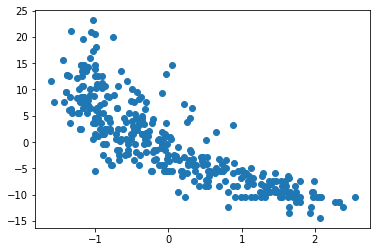

In [241]:
plt.scatter(X_train[:,3], y_train)
plt.plot(sorted(abs(mean)),color='red', linewidth=1)
plt.xlim(-2, 10)
plt.ylim(-20, 20)
plt.show()

In [235]:
sorted(mean)

[-14.371377428512002,
 -14.369635140852926,
 -14.368842618219153,
 -14.368268353258827,
 -14.366962659735874,
 -14.366879063305234,
 -14.361433904347667,
 -14.360026963378191,
 -14.35990860967565,
 -14.359499226133718,
 -14.356557557725903,
 -14.3555544167679,
 -14.347766486758475,
 -14.343121249651386,
 -14.33436488410841,
 -14.329422306971022,
 -14.32845863631691,
 -14.32558889676347,
 -14.32126757658141,
 -14.30114686778175,
 -14.299830664495953,
 -14.27758599145508,
 -14.271545260906946,
 -14.24367588937681,
 -14.206238515671785,
 -14.170606647665,
 -14.1594044446896,
 -14.1594044446896,
 -14.153999787107907,
 -14.145504018685642,
 -14.115929748415173,
 -14.104837576691263,
 -14.098843890893743,
 -14.06807161671022,
 -14.060786906827124,
 -14.034046184622417,
 -14.030051123708285,
 -13.997411224694496,
 -13.956662119976672,
 -13.95308809605952,
 -13.936997462014661,
 -13.91713911436132,
 -13.858465582046087,
 -13.849542342972923,
 -13.815819312151184,
 -13.80596305220859,
 -13.7982

In [233]:
print(mean.sort())

None


In [236]:
kernelN

array([[1.        , 0.89275245, 0.71775776, ..., 0.48932753, 0.81180329,
        0.61974619],
       [0.89275245, 1.        , 0.66799075, ..., 0.74245666, 0.80160564,
        0.63659965],
       [0.71775776, 0.66799075, 1.        , ..., 0.41337805, 0.56227125,
        0.3091214 ],
       ...,
       [0.48932753, 0.74245666, 0.41337805, ..., 1.        , 0.60980434,
        0.42880097],
       [0.81180329, 0.80160564, 0.56227125, ..., 0.60980434, 1.        ,
        0.75992989],
       [0.61974619, 0.63659965, 0.3091214 , ..., 0.42880097, 0.75992989,
        1.        ]])